# CSC425 - Artificial Intelligence
## Programming Assignment 1
## Ahnaf Abdullah - 2130223


### Setup

#### Imports and defines

We will be using these libraries, as well as defining some constants that will be used throughout this entire project.

In [101]:
from copy import copy, deepcopy             # needed to copy list elements when entering recursive calls. Simple reassignment will not work as python copies references
from matplotlib import pyplot               # pprint_maze_GUI()
from matplotlib.patches import Circle       # pprint_maze_GUI()
from PIL import Image                       # create_maze_from_image()

# these two are just for the convenience of downloading maze images into colab
import os
import requests

# results are not appearing well on google colab, due to poor visual quality enforced by png. force to svg
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

## maze is a 2d array of integers, define the following constants for use on the maze
GOAL = 255
FLEA = 128
START = 64
BLOCK = 1
EMPTY = 0


<ipython-input-101-c9c5cfd86dc2>:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


#### Helper functions

For convenience and elegance (and also because I was bored during the shutdown), I came up with some tools that will make the code/output look good.

In [102]:
def pprint_maze(maze: list[list[int]], action: tuple[int, int] = None, goal: tuple[int, int] = None, path: list[tuple[int, int]] = None):
    """Prints the maze(and it's current state if provided) in console/stdout. """
    def map_mazeelements(i: int):
        if i == GOAL:
            return 'G'
        elif i == FLEA:
            return '•'
        elif i == START:
            return 'S'
        elif i == BLOCK:
            return '█'
        else:
            return ' '

    maze = deepcopy(maze)
    if action is not None:
        maze[action[1]][action[0]] = FLEA
    if goal is not None:
        maze[goal[1]][goal[0]] = GOAL

    # implement drawing the goal and flea positions later
    if path is not None:
        start = path.pop(0)
        maze[start[0]][start[1]] = START
        for ac in path:
            maze[start[0]][start[1]] = FLEA

    for row in maze:
        print(''.join([map_mazeelements(cell) for cell in row]))


In [103]:
def pprint_maze_GUI(maze: list[list[int]], action: tuple[int, int] = None, goal: tuple[int, int] = None, path: list[tuple[int, int]] = None):
    """Renders the maze(and it's current state if provided) in an image via matplotlib. """
    #maze = deepcopy(maze)     # this deepcopy shouldn't be necessary we aren't modifying maze anywhere...

    def draw_circle(x, y, r=0.5, facecolor="blue"):
        pyplot.gca().add_patch(Circle((x+0.5,y+0.5), r, facecolor=facecolor))

    #def draw_rectangle(x_bl, y_bl, ):
        #pyplot.gca().add_patch(Rectangle(x_bl+0.5, y_bl+0.5, ))

    #pyplot.axes().invert_yaxis()
    pyplot.axes().set_aspect('equal')
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.pcolormesh(maze, cmap='Greys')

    if goal is not None:
        draw_circle(goal[0], goal[1], facecolor="green")

    if path is not None:
        start = path[0]
        draw_circle(start[0], start[1], r=0.35, facecolor="red")
        for ac in path:
            draw_circle(ac[0], ac[1], r=0.25, facecolor="lightblue")

    if action is not None:
        draw_circle(action[0], action[1], r=0.35)

    pyplot.gca().invert_yaxis()
    pyplot.show()


In [104]:
#@markdown At one point I was tired of manually generating test cases by hand and so came up with a function that takes the maze as an image input and produces an inputstring similar to the one in the problem statement that can now be interpreted by other student implementations as well. MSPaint can be used to draw the mazes.
def create_maze_from_image(path):
    maze_img = Image.open(path)
    r, c = maze_img.size
    #print(c, r)   # x, y
    flea_pos = None
    goal_pos = None
    num_blocks = 0
    blocks = []

    for x in range(r):
        for y in range(c):
            pixel = maze_img.getpixel((x, y))[:3]   # get rgb val
            if (pixel == (0, 0, 0)):  # black, block
                num_blocks += 1
                blocks.append((x, y))
            elif (pixel == (0, 255, 0)):   # green, goal
                goal_pos = (x, y)
            elif (pixel == (255, 0, 0)):   # red, start pos
                flea_pos = (x, y)
            elif (pixel == (255, 255, 255)):   # white, traverseable, pass
                pass
            else:
                print("UNEXPECTED PIXEL: %s at %s" % (pixel, (x, y)))   # unexpected pixels will be ignored (same function as white)

    returnstr = "{} {}\n".format(r, c)
    returnstr += "{} {}\n".format(flea_pos[0]+1, flea_pos[1]+1)
    returnstr += "{} {}\n".format(goal_pos[0]+1, goal_pos[1]+1)
    returnstr += "{}\n".format(num_blocks)

    for b in blocks:
        returnstr += "{} {}\n".format(b[0]+1, b[1]+1)

    #print(returnstr)
    return returnstr



In [105]:
def download_pic_from_github_and_save_in_colab():
  images = ["https://raw.githubusercontent.com/cinco-de-mayonnaise/CSC425-ProgrammingAssignment1/main/maze_bigsimple.png",
            "https://raw.githubusercontent.com/cinco-de-mayonnaise/CSC425-ProgrammingAssignment1/main/maze_question.png",
            "https://raw.githubusercontent.com/cinco-de-mayonnaise/CSC425-ProgrammingAssignment1/main/maze_smol.png",
            "https://raw.githubusercontent.com/cinco-de-mayonnaise/CSC425-ProgrammingAssignment1/main/maze_edgecase.png",]

  for i in images:
    img_data = requests.get(i).content
    with open(i.split('/')[-1], 'wb') as handler:
      handler.write(img_data)
download_pic_from_github_and_save_in_colab()

## Problem Statement
```
Consider a maze-like environment of dimension n x n like the image below. At each time step, suppose a
flea can move North, East, South, or West (but not diagonally) into an adjacent square if that square is
currently free, or the insect may stay in its current location. Squares may be blocked by walls (as denoted
by the black squares), but the map is known.
However, in addition to moving along the maze as usual, your flea can jump on top of the walls. When on
a wall, the flea can walk along the top of the wall (i.e., on th black squares) as it would when in the maze.
It can also jump off of the wall, back into the maze. Jumping onto the wall has a cost of 2, while all other
actions (including jumping back into the maze) have a cost of 1. Note that the flea can only jump onto
walls that are in adjacent squares (either north, south, west, or east of the flea).
You are to write a program that implements Branch and Bound with DFS to find the shortest path to the
goal position (marked by X). The auctions of the flea are : N, S, E, W, JN, JS, JE, JW which stand for move
north, south, east, west, jump on the wall (black square) to the north, jump on the wall to the south and
so on. You should output the sequence of moves and the total cost of the shortest path. You can
implement whatever heuristic you find suitable. If there exists no path to the goal position output “no
path exists”.
```
## Criteria

```
(a) Your program should be runnable in google colab
(b) You should provide 3 input files that contain 3 instances of the problem (three different mazes and
start and goal positions) and 3 output files containing the outputs of your program for these 3 input files.

Total Points: 20
Correctness of the implementing the search algorithm: 10 points
Correctness of input / output format: 5 points
Submission of input/output files: 5 points
```




## Approach

I define the maze as 2 dimensional list of lists(analogous to a 2D array) of integers, which describes the position of all the blocks in the maze. We want to keep the maze as simple as possible to make the implementation simple and fast. The goal position and the start position should be independent of the maze, as we will see soon, so we will store them in seperate variables.

Our goal is to find the shortest path (with least cost) from the flea's position to the goal position. We will achieve this by generating a graph of states each representing a path from the start position to some arbitrary position on the maze. From any state, we can ask the following questions:

*   In what ways can the flea move from this position(current state)
*   How will the cost change depending on the flea's movement?

To deal with this, we use the abstractions $\texttt{get_possible_actions()}$, which considers and returns all the actions possible from the flea's current position. We must consider that a. the flea is not able to move out of the maze, and that b. jumping along a wall costs more than walking on an empty tile.
This function checks the maze and returns the actions possible.

As movements, and jumping on the wall can cause the state and cost to change, we want to have a well defined $\texttt{take_action()}$ that changes the current state to the next state consistently. We must consider that the cost of a movement in the maze is typically 1, except for when the flea is jumping from wall to wall, where it costs 2.

---


**State**: But how should we define our state? We only really need to track two things.

*   Current position ($\texttt{flea_pos}$)
*   Total Cost


Everything else (maze, goal_pos) influences the state space, but doesn't really change, so we can hoist it out of the state. This makes our graph implementation small and supple. Thus, our initial state is

  $$s_0 = (\texttt{flea_pos}, 0)$$

And we start to consider all states that could exist(i.e. we could move to) from our current state. For example, we can move in the 4 cardinal directions

  $$
  \begin{aligned}
          s_0 &\xrightarrow{N} s_N &= (\texttt{flea_pos.y}-1, 1) \\
            &\xrightarrow{W} s_W &= (\texttt{flea_pos.x}-1, 1)\\
            &\xrightarrow{S} s_S &=(\texttt{flea_pos.y}+1, 1)\\
            &\xrightarrow{E} s_E &=(\texttt{flea_pos.x}+1, 1)
  \end{aligned}
  $$
and so on, until we find a path that leads to the exit. suppose $p_1$ which has a cost of 7. We keep this in mind as the bound: the maximum length a path to the goal can be before we discard it. Then we start traversing from $s_0$ again until we have evaluated all paths with cost less than 7. If we don't find an even shorter path during this, we can return this path we found as the shortest, or else we start traversing again with a newer bound. This is the principle of the DFS Branch and Bound Algorithm.


## Code


### Abstraction
Here we have some abstractions that makes the final BranchAndBound DFS Algorithm easier to read


In [106]:
def get_possible_actions(maze: list[list[int]], cur_state: tuple[int, int, int]):
    """Returns the set of possible actions that can be taken from the current state. Requires the maze to decide what actions are possible."""
    r, c = len(maze), len(maze[0])
    flea_x, flea_y = cur_state[0:2]
    actions = []

    # Check North
    if flea_y > 0:
        if maze[flea_y-1][flea_x] == BLOCK:
            actions.append("JN")
        else:
            actions.append("N")
    # West
    if flea_x > 0:
        if maze[flea_y][flea_x-1] == BLOCK:
            actions.append("JW")
        else:
            actions.append("W")
    # South
    if flea_y < r-1:
        if maze[flea_y+1][flea_x] == BLOCK:
            actions.append("JS")
        else:
            actions.append("S")
    # East
    if flea_x < c-1:
        if maze[flea_y][flea_x+1] == BLOCK:
            actions.append("JE")
        else:
            actions.append("E")
    return actions


In [107]:
def take_action(action: str, cur_state: tuple[int, int, int]):
    """Takes an action based on the current state and returns the new state

    `action` must be a valid action that can be taken from the current state, based on the return values of `get_possible_actions(maze, cur_state)`.
    No error checking is done inside this function
    """
    flea_x, flea_y = cur_state[0:2]
    cost = cur_state[2]

    if action == "N":
        return (flea_x, flea_y-1, cost+1)
    elif action == "W":
        return (flea_x-1, flea_y, cost+1)
    elif action == "S":
        return (flea_x, flea_y+1, cost+1)
    elif action == "E":
        return (flea_x+1, flea_y, cost+1)

    elif action == "JN":
        return (flea_x, flea_y-1, cost+2)
    elif action == "JW":
        return (flea_x-1, flea_y, cost+2)
    elif action == "JS":
        return (flea_x, flea_y+1, cost+2)
    elif action == "JE":
        return (flea_x+1, flea_y, cost+2)
    else:
        raise ValueError("Invalid action")

In [108]:
def action_taken(cur_state: tuple[int, int, int], next_state: tuple[int, int, int]) -> str:
    """Returns the (single) action that allows cur_state to change to next_state. Returns None if no such action is possible.
    No maze-based information is used, so ensure that cur_state and next_state are two successive states of a valid path through the maze!"""
    for ac in ["N", "W", "S", "E", "JN", "JW", "JS", "JE"]:
        if next_state == take_action(ac, cur_state):
            return ac

    return None


### Depth First Search - Branch&Bound Algorithm

This is the actual work that was asked to be done in the programming assignment. Please refer to this for grading.

In [109]:
def DFS_BB(maze: list[list[int]], startstate:tuple[int, int, int], goal, h, bound_max=10000):
    """
    Performs a depth-first search with branch and bound to find the shortest path from the flea to the goal.
    This is the verbatim version of the algorithm taken from the book, with barely any changes to the algorithm.
    As a result, it is correct, but not very efficient. This function serves as the base for other functions with improved performance.

    For grading the correctness of the algorithm, please use this function only.
    """

    bound = bound_max
    best_path = None
    steps = 0

    def cbsearch(path: list[tuple[int, int, int]]):
        nonlocal bound
        nonlocal best_path
        nonlocal steps

        cur_node = path[-1]
        if (cur_node[2] + h(cur_node)) < bound:      # cost(path) + h(cur_node)) < bound, but... cost of the path is just the total cost... that's already part of the state
            if goal(cur_node):
                best_path = deepcopy(path)
                bound = cur_node[2]
                #print(bound)
            else:
                for ac in get_possible_actions(maze, cur_node):
                    newpath = deepcopy(path)
                    newpath.append(take_action(ac, cur_node))
                    #print(len(path))
                    cbsearch(newpath)

        steps+=1

    cbsearch([startstate])

    print("Recursive call depth: ", steps)

    return best_path    # this is guaranteed to be the smallest path through the maze.


### Executor: `main()` function

In [121]:
#@markdown Once you select a path, you should click on Run Cell to update the main() function.
def main():
    path = 'maze_bigsimple.png' # @param ["maze_question.png", "maze_bigsimple.png", "maze_smol.png", "maze_edgecase.png"]
    input1 = create_maze_from_image(path)

    inputshorok = [int(k) for k in input1.split()]
    c, r = inputshorok[0], inputshorok[1]           # number of rows and number of columns of the grid
    flea_pos = (inputshorok[2]-1, inputshorok[3]-1)     # initial position of the flea
    goal_pos = (inputshorok[4]-1, inputshorok[5]-1)     # coordinates of the goal location
    num_blocks = inputshorok[6]                     # number of blocked cells

    # pop first 7 numbers from the list
    inputshorok = inputshorok[7:]
    # everything else in the input should now be a coordinate, do offset
    inputshorok = [i-1 for i in inputshorok]
    maze = [[0 for i in range(c)] for j in range(r)]
    try:
        for i in range(num_blocks):
            x, y = inputshorok[0:2]
            inputshorok = inputshorok[2:]
            maze[y][x] = BLOCK
    except Exception as e:
        print("WARNING: Not enough coordinates for the number of blocks specified!")

    if len(inputshorok) > 0:
        print("WARNING: More block coordinates provided than number of blocks specified! Ignoring the rest")

    # test get_possible_actions()
    # testcases = [(0, 0, 0), (1, 1, 0), (1, 0, 0), (0, 1, 0)]
    # for t in testcases:
    #     print("%s:%s" % (t, get_possible_actions(maze, t)))

    # test take_action()
    #pprint_maze(maze, action=flea_pos, goal=goal_pos)
    print("Given maze is: ")
    pprint_maze_GUI(maze, action=flea_pos, goal=goal_pos)
    print("\n")
    # run the DFS_BranchAndBound algorithm
    def goal(state: tuple[int, int, int]):
        return state[0:2] == goal_pos

    def h(state: tuple[int, int, int]):
        return abs(state[0]-goal_pos[0]) + abs(state[1]-goal_pos[1])    # Manhattan distance heuristic, will definitely be <cost(s) because sometimes an action may cost 2

    shortest_path = DFS_BB(maze, (flea_pos[0], flea_pos[1], 0), goal, h, bound_max=225)
    if (shortest_path is None):
        print("No shortest path was found through the given maze within the bound provided.")
    else:
        print("Shortest path found!:", shortest_path)
        actionstr = ""
        for i in range(len(shortest_path) - 1):
            actionstr += (action_taken(shortest_path[i], shortest_path[i+1]) + ' ')

        print("Actions: %s" % actionstr)
        print("Cost: %s" % shortest_path[-1][-1])


    #for ac in shortest_path:
    #    pprint_maze(maze, ac, goal=goal_pos)
    #    print()

    pprint_maze_GUI(maze, goal=goal_pos, path=shortest_path)

### Execution of 3 inputs

#### Input 0:

As a sanity check, we test our program against the given maze in the question to see if our answers match. There is strangely, a discrepancy, as the question seems to have one less "E" action. I don't understand how the example in the question can actually reach the goal state with one fewer E, so I believe my sequence of action is correct.

Given maze is: 


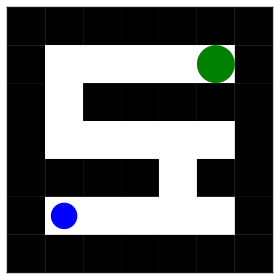



Recursive call depth:  3488
Shortest path found!: [(1, 5, 0), (1, 4, 2), (1, 3, 3), (1, 2, 4), (1, 1, 5), (2, 1, 6), (3, 1, 7), (4, 1, 8), (5, 1, 9)]
Actions: JN N N N E E E E 
Cost: 9


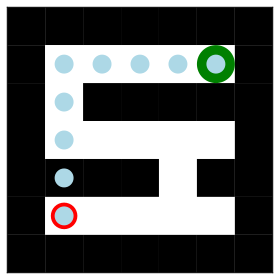

In [114]:
main()

#### Input 1:

Here we can observe how the algorithm decides that jumping onto the wall produces a lower cost path(3) than having to go around the wall (which would cost 12 in this case)

Given maze is: 


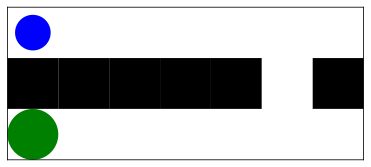



Recursive call depth:  373
Shortest path found!: [(0, 0, 0), (0, 1, 2), (0, 2, 3)]
Actions: JS S 
Cost: 3


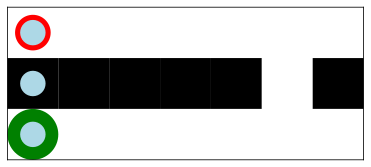

In [117]:
main()

#### Input 2:

A typical maze, which is solved very strangely.

Given maze is: 


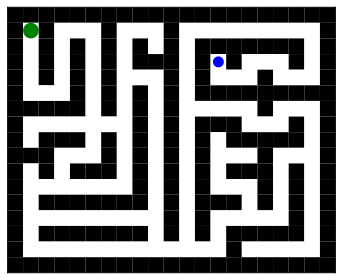



Recursive call depth:  1941
Shortest path found!: [(13, 3, 0), (13, 2, 2), (13, 1, 3), (12, 1, 4), (11, 1, 5), (10, 1, 7), (9, 1, 8), (8, 1, 9), (7, 1, 10), (6, 1, 12), (5, 1, 13), (4, 1, 14), (3, 1, 15), (2, 1, 17), (1, 1, 18)]
Actions: JN N W W JW W W W JW W W W JW W 
Cost: 18


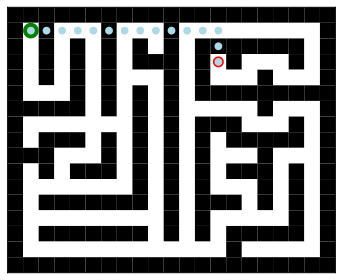

In [119]:
main()

#### Input 3:

A giant maze, which tests the computational limits of Google Colab. For better performance, we should really optimize the search algorithm...  

(If you can't see the path, zoom in to see the picture)

In [122]:
main()

Given maze is: 




Recursive call depth:  13777
Shortest path found!: [(151, 70, 0), (152, 70, 1), (153, 70, 2), (153, 69, 3), (153, 68, 4), (153, 67, 5), (153, 66, 6), (153, 65, 7), (153, 64, 8), (153, 63, 9), (153, 62, 10), (153, 61, 11), (153, 60, 12), (153, 59, 13), (153, 58, 14), (153, 57, 15), (153, 56, 16), (153, 55, 17), (152, 55, 18), (151, 55, 19), (150, 55, 20), (149, 55, 21), (148, 55, 22), (147, 55, 23), (146, 55, 24), (145, 55, 25), (144, 55, 26), (143, 55, 27), (142, 55, 28), (141, 55, 29), (140, 55, 30), (139, 55, 31), (138, 55, 32), (137, 55, 33), (136, 55, 34), (135, 55, 35), (134, 55, 36), (133, 55, 37), (132, 55, 38), (131, 55, 39), (130, 55, 40), (129, 55, 41), (128, 55, 42), (127, 55, 43), (126, 55, 44), (125, 55, 45), (124, 55, 46), (123, 55, 47), (122, 55, 48), (121, 55, 49), (120, 55, 50), (119, 55, 51), (118, 55, 52), (118, 54, 53), (118, 53, 54), (118, 52, 55), (118, 51, 56), (118, 50, 57), (118, 49, 58), (118, 48, 59), (118, 47, 60), (118, 46, 61), (118, 45, 62), (118, 44, 6

### Addendum

#### Optimization

We reimplement the DFS BranchAndBound Algorithm to improve its performance. In the original provided description of the algorithm there are two major concerns:
* Lack of consideration for graph implementation
* No cycle detection/avoidance

##### Graph Implementations


In [123]:
#@markdown The first optimization I came up with was when I was busy troubleshooting a mistake in the algorithm and observed that many paths consisted of going in circles until the cost eventually exceeded bound. But why should we waste time on such fruitless paths?
def DFS_BB_v1(maze: list[list[int]], startstate:tuple[int, int, int], goal, h, bound_max=2**32):
    """
    Performs a depth-first search with branch and bound to find the shortest path from the flea to the goal.
    This version adds cycle detection and avoids cyclic paths as they are guaranteed to not be a shortest path.
    """
    def isCycle(path: list[tuple[int, int, int]], *args) -> bool:
        visited = set()
        for st in path:
            st = st[:2]
            #print(st)
            if st in visited:
                return True
            else:
                visited.add(st)

        for st in args:   # throw in more states here why not xd
            st = st[:2]
            #print(st)
            if st in visited:
                return True
            else:
                visited.add(st)

        return False

    bound = bound_max
    best_path = None
    steps = 0
    max_len_path = 0

    def cbsearch(path: list[tuple[int, int, int]]):
        nonlocal bound
        nonlocal best_path
        nonlocal steps
        nonlocal max_len_path

        cur_node = path[-1]

        if (cur_node[2] + h(cur_node)) < bound:      # cost(path) + h(cur_node)) < bound, but... cost of the path is just the total cost... that's already part of the state
            if goal(cur_node):
                best_path = deepcopy(path)
                bound = cur_node[2]
                #print(bound)
            else:
                for ac in get_possible_actions(maze, cur_node):
                    if (isCycle(path, take_action(ac, cur_node))):
                        continue            # this action causes it to become a cycle, so avoid this.
                    newpath = deepcopy(path)
                    newpath.append(take_action(ac, cur_node))

                    cbsearch(newpath)

        steps+=1

    cbsearch([startstate])

    print("Recursive call depth: ", steps)

    return best_path    # this is guaranteed to be the smallest path through the maze.

In [124]:
def DFS_BB_v2(maze: list[list[int]], startstate:tuple[int, int, int], goal, h, bound_max=2**32):
    """
    Performs a depth-first search with branch and bound to find the shortest path from the flea to the goal.
    This version abstracts away state into a unique integer and tracks it seperately, while also avoiding cycles.
    """
    class Graph:
        nodes = dict() # graph: set[State]

        def __init__(self):
            pass

        def putStateInGraph(self, state: tuple[int, int, int]) -> int:
            h = hash(state)
            if (self.nodes.get(h, None) is not None) and (self.nodes[h] != state):
                raise Exception("OH NO HASH COLLISION!!")
            self.nodes[h] = state
            return h

        def getStateFromID(self, id:int):
            return self.nodes.get(id)

        """these are kind of useless"""
        def getCostFromID(self, id:int):
            return self.nodes.get(id)[-1]

        def getPosFromID(self, id:int):
            return self.nodes.get(id)[:2]

    def isCycle_v1(path: list[int], *args) -> bool:
        visited = set()   # visited is a set of hashes
        for st in path:
            #print(st)
            h = hash(gra.getPosFromID(st))
            if h in visited:
                return True
            else:
                visited.add(h)

        for st in args:   # throw in more states here why not xd
            #print(st)
            h = hash(gra.getPosFromID(st))
            if h in visited:
                return True
            else:
                visited.add(h)

        return False

    def isCycle_v2(path: list[int], *args) -> bool:
        visited = set()   # visited is a set of positions, less efficient
        for st in path:
            #print(st)
            st = gra.getPosFromID(st)
            if st in visited:
                return True
            else:
                visited.add(st)

        for st in args:   # throw in more states here why not xd
            #print(st)
            st = gra.getPosFromID(st)
            if st in visited:
                return True
            else:
                visited.add(st)

    bound = bound_max
    best_path = None
    steps = 0
    gra = Graph()


    def cbsearch(path: list[int]):
        nonlocal bound
        nonlocal best_path
        nonlocal steps
        nonlocal gra

        cur_node = gra.getStateFromID(path[-1])

        if (cur_node[2] + h(cur_node)) < bound:      # cost(path) + h(cur_node)) < bound, but... cost of the path is just the total cost... that's already part of the state
            if goal(cur_node):
                best_path = copy(path)
                bound = cur_node[2]
                #print(bound)
            else:
                for ac in get_possible_actions(maze, cur_node):
                    if (isCycle_v1(path, gra.putStateInGraph(take_action(ac, cur_node)))):
                        continue            # this action causes it to become a cycle, so avoid this.
                    newpath = copy(path)
                    newpath.append(gra.putStateInGraph(take_action(ac, cur_node)))

                    cbsearch(newpath)

        steps+=1

    cbsearch([gra.putStateInGraph(startstate)])
    #print(gra.nodes)
    print("Recursive call depth: ", steps)

    # best_path is a list of hashes, we need to turn them back into states.
    returnpath = []
    for h in best_path:
        returnpath.append(gra.getStateFromID(h))

    return returnpath    # this is guaranteed to be the smallest path through the maze.


##### Performance Comparison

TESTING ON maze_question.png
Given maze is: 


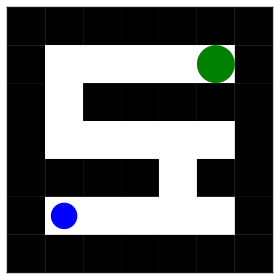



Recursive call depth:  3488
Recursive call depth:  439
Recursive call depth:  439


Time taken by Original: 0.712865
Time taken by CycleAvoidance: 0.026712
Time taken by CycleAvoidance+GraphImpl: 0.009462


TESTING ON maze_bigsimple.png
Given maze is: 




Recursive call depth:  13777
Recursive call depth:  10008
Recursive call depth:  10008


Time taken by Original: 4.74954
Time taken by CycleAvoidance: 3.191103
Time taken by CycleAvoidance+GraphImpl: 0.706851


TESTING ON maze_smol.png
Given maze is: 


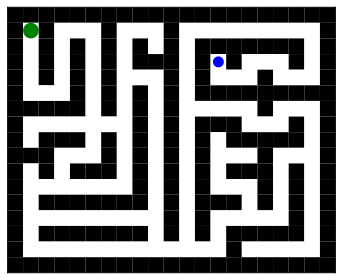



Recursive call depth:  1941
Recursive call depth:  1075
Recursive call depth:  1075


Time taken by Original: 0.26447
Time taken by CycleAvoidance: 0.06734
Time taken by CycleAvoidance+GraphImpl: 0.035263


TESTING ON maze_edgecase.png
Given maze is: 


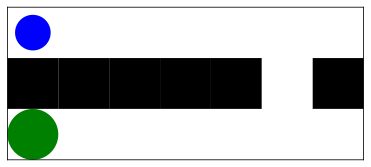



Recursive call depth:  373
Recursive call depth:  5
Recursive call depth:  5


Time taken by Original: 0.214977
Time taken by CycleAvoidance: 0.00127
Time taken by CycleAvoidance+GraphImpl: 0.000198




In [125]:
def performance_test(path: str):

    print("TESTING ON %s" % path)
    input1 = create_maze_from_image(path)

    inputshorok = [int(k) for k in input1.split()]
    c, r = inputshorok[0], inputshorok[1]           # number of rows and number of columns of the grid
    flea_pos = (inputshorok[2]-1, inputshorok[3]-1)     # initial position of the flea
    goal_pos = (inputshorok[4]-1, inputshorok[5]-1)     # coordinates of the goal location
    num_blocks = inputshorok[6]                     # number of blocked cells

    # pop first 7 numbers from the list
    inputshorok = inputshorok[7:]
    # everything else in the input should now be a coordinate, do offset
    inputshorok = [i-1 for i in inputshorok]
    maze = [[0 for i in range(c)] for j in range(r)]
    try:
        for i in range(num_blocks):
            x, y = inputshorok[0:2]
            inputshorok = inputshorok[2:]
            maze[y][x] = BLOCK
    except Exception as e:
        print("WARNING: Not enough coordinates for the number of blocks specified!")

    if len(inputshorok) > 0:
        print("WARNING: More block coordinates provided than number of blocks specified! Ignoring the rest")


    # test take_action()
    #pprint_maze(maze, action=flea_pos, goal=goal_pos)
    print("Given maze is: ")
    pprint_maze_GUI(maze, action=flea_pos, goal=goal_pos)
    print("\n")
    # run the DFS_BranchAndBound algorithm
    def goal(state: tuple[int, int, int]):
        return state[0:2] == goal_pos

    def h(state: tuple[int, int, int]):
        return abs(state[0]-goal_pos[0]) + abs(state[1]-goal_pos[1])    # Manhattan distance heuristic, will definitely be <cost(s) because sometimes an action may cost 2

    b = 225  # should be the same for all 3 versions or its unfair

    import datetime
    time_begin = datetime.datetime.now()
    shortest_path = DFS_BB(maze, (flea_pos[0], flea_pos[1], 0), goal, h, bound_max=b)
    time_DFS_v0 = datetime.datetime.now()
    time_DFS_v0 = (time_DFS_v0 - time_begin).total_seconds()

    time_begin = datetime.datetime.now()
    shortest_path_1 = DFS_BB_v1(maze, (flea_pos[0], flea_pos[1], 0), goal, h, bound_max=b)
    time_DFS_v1 = datetime.datetime.now()
    time_DFS_v1 = (time_DFS_v1 - time_begin).total_seconds()

    time_begin = datetime.datetime.now()
    shortest_path_2 = DFS_BB_v2(maze, (flea_pos[0], flea_pos[1], 0), goal, h, bound_max=b)
    time_DFS_v2 = datetime.datetime.now()
    time_DFS_v2 = (time_DFS_v2 - time_begin).total_seconds()

    # if (shortest_path is None):
    #     print("No shortest path was found through the given maze within the bound provided.")
    # else:
    #     print("Shortest path found!:", shortest_path)
    #     actionstr = ""
    #     for i in range(len(shortest_path) - 1):
    #         actionstr += (action_taken(shortest_path[i], shortest_path[i+1]) + ' ')

    #     print("Actions: %s" % actionstr)
    #     print("Cost: %s" % shortest_path[-1][-1])

    # sanity
    if (shortest_path != shortest_path_1):
        raise Exception("what the")

    # compare performance
    print("\n\nTime taken by Original: {}".format(time_DFS_v0))
    print("Time taken by CycleAvoidance: {}".format(time_DFS_v1))
    print("Time taken by CycleAvoidance+GraphImpl: {}".format(time_DFS_v2))
    print("=====================================\n\n")

performance_test("maze_question.png")
performance_test("maze_bigsimple.png")
performance_test("maze_smol.png")
performance_test("maze_edgecase.png")